In [1]:
import importlib
import labs

importlib.reload(labs)
from labs import *

# 1차 목표
- D[1,2,3] 데이터셋 살펴보기
- 사전 학습 모델로 파인튜닝 없이 바로 예측해보기 
  - 모델 입력값 등에 대한 기본 API 파악과 정상 동작 여부 체크 목적
  - 파인 튜닝 없이 기존 클래스 비교 

## 결과
- 영문으로 학습된 대부분의 이미지는 같은 문서 종류라도 한글이 있으면 (영문 영수증 vs 한글 영수증)
- 대부분의 파인튜닝된 모델에서 잘 인식 안됨 (기타 등등으로 분류)

### 주의
- D3 사진들 중 일부는 회전되어 있음
  - ImageOps.exif를 활용하여 방향 맞추기
  
```python
image = Image.open("./sample/d3.jpg").convert("RGB")
image = ImageOps.exif_transpose(image)
```

## 샘플 원본 데이터 시각화
- 샘플 로드 초코 함수
```python
easy_sample('1'), easy_sample('2'), easy_sample('3-1')
```

In [10]:
image, category, words, boxes, boxes_o, meta = easy_sample('3-1')
# painted = paint_bound_boxes(image, boxes_o)
# show_img(image=painted, figsize=(10, 10))

In [3]:
# pretty_json(meta)   

# 모델 (영수증, 금융 파인튜닝)

In [16]:
from transformers import LayoutLMv3ForSequenceClassification, LayoutLMv3Processor

In [18]:
model_card = "curiousily/layoutlmv3-financial-document-classification"
model = LayoutLMv3ForSequenceClassification.from_pretrained(model_card)
processor = LayoutLMv3Processor.from_pretrained("microsoft/layoutlmv3-base")

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/504M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/504M [00:00<?, ?B/s]

# 추론 결과

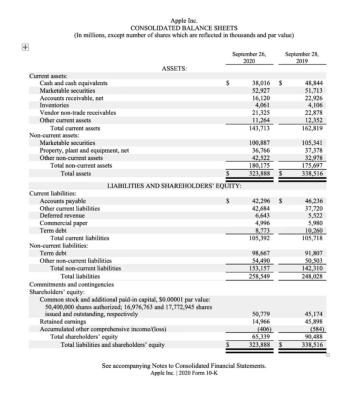

In [49]:
image = Image.open('./sample/balance.webp').convert('RGB')
show_img(image=image, figsize=(5, 5))

In [43]:
example = processor(image, return_tensors="pt", truncation=True, padding="max_length")

In [46]:
outputs = model(**example)
print(model.config.id2label)  # 모델 학습 카테고리
print("Logits shape:", outputs.logits.shape)   # outputs shape

{0: 'balance_sheets', 1: 'cash_flow', 2: 'income_statement', 3: 'notes', 4: 'others'}
Logits shape: torch.Size([1, 5])


In [47]:
predicted_category = outputs.logits.argmax().item()
label = model.config.id2label[predicted_category]
print(predicted_category, label)

0 balance_sheets
